<a href="https://colab.research.google.com/github/panktiHT/CanadianCheeseML/blob/main/Reaction%20modelling%20and%20reactor%20sizing%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science Example

Pankti Shah
---



In [31]:
import pandas as pd

# Load the data from the relevant sheet
df1 = pd.read_excel('/content/PSE-Take-Home-Question-Dataset (1).xlsx')

# Display the first few rows of the dataset to understand its structure
df1.head()

# Rename columns
df1.columns = ['time (s)', 'Conversion A, Temp = 50 C', 'time (s)','Conversion B, Temp = 70 C', 'time (s)','Conversion A, Temp 90 C','time (s)', 'Conversion A, Temp = 110C']

# Remove row 0
df1 = df1.drop(index=0)

# Convert all columns to numeric, with errors='coerce' to handle non-numeric values
df1 = df1.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0
df1 = df1.fillna(0)

df1

,time (s),"Conversion A, Temp = 50 C",time (s),"Conversion B, Temp = 70 C",time (s),"Conversion A, Temp 90 C",time (s),"Conversion A, Temp = 110C"
1,0.0,0.00,0,0.00,0.0,0.00,0,0.00
2,155.0,0.21,114,0.21,118.0,0.27,120,0.40
3,303.0,0.28,570,0.30,590.0,0.56,600,0.65
4,622.0,0.29,1140,0.35,1180.0,0.68,1200,0.79
5,1212.0,0.30,1710,0.52,1770.0,0.70,1800,0.88
6,1840.0,0.45,2280,0.56,2360.0,0.78,2400,0.88
7,2343.0,0.47,3420,0.61,3540.0,0.77,3600,0.89
8,3480.0,0.52,6840,0.74,7080.0,0.83,7200,0.84
9,4640.0,0.50,10260,0.71,10620.0,0.78,10800,0.86
10,7244.0,0.61,13680,0.70,14160.0,0.83,14400,0.86


# Reaction Modelling for A --> B
## Analytical Approach
  1. Derive rate law based on reaction mechanism

    -Assuming first-order reaction

  $\frac{d[A]}{dt}$ = -K[A]

  CSTR- reaction occurs at steady state, reactor well-mixed, concentration of reactant/product uniform

  𝜏 = $\frac{1}{K(1-x)}$ where K is constant and X is conversion.
  >Tau residence time (average time a reactant molecule spends in reactor)

  To calculate K: obtain steady-state conversion X corresponding to residence time 𝜏 at different temperatures.

  K = $\frac{1}{𝜏(1-x)}$
  > Calculate K for each temperature.

 Then for each temperature, average K will be used.

  2. Apply Arrhenius Equation

  > Use this to find E$_a$ and A, the pre-exponential function

  > Plot ln(K) against 1/T

   - Get plot

   - Extract activation energy and coefficient A

  Arrhenius equation is used to calculate rate constant K as a function of T. We can get relationship between rate constant and temperature, how reaction rate increases with temperature

  K = $A^{\frac{-E_a}{RT}}$

  Now we have experimental data at different temperatures and need to calculate K

  $\underline{Steps}$

  Step 1. Fit first order kinetics
  Step 2. Linearize Arrhenius equation
  > Take natural log:
  > ln[K] = ln[A] - $\frac{E_a}{RT}$

  Step 3. Plot and linear regression: plot ln[K] and 1/T (Kelvin).  
  > Slope = $\frac{E_a}{RT}$
  > Intercept = ln[A]
  > can calculate E$_A$ and A

In [43]:
# Need to reaarange the data in certain formate to make calculation easier
# Load the data from the relevant sheet
df = pd.read_excel('/content/PSE-Take-Home-Question-Dataset (1).xlsx')

# Prepare a list to hold data for each temperature
temperature_data = []

# Process each temperature column
for temp in ['T = 50 C', 'T = 70 C', 'T = 90 C', 'T = 110 C']:
    # Extract relevant columns
    df_temp = df[[temp, df.columns[df.columns.get_loc(temp) + 1]]].iloc[1:].dropna()
    df_temp.columns = ['time (s)', 'conversion X']
    df_temp = df_temp.astype(float)

    # Calculate k for each time point
    df_temp['k (s^-1)'] = df_temp['conversion X'] / ((1 - df_temp['conversion X']) * df_temp['time (s)'])

    # Add a column for temperature
    df_temp['temperature'] = temp

    # Append to the list
    temperature_data.append(df_temp)

# Concatenate all temperature data
df_all_temps = pd.concat(temperature_data, ignore_index=True)

df_all_temps

,time (s),conversion X,k (s^-1),temperature
0,0.0,0.00,NaN,T = 50 C
1,155.0,0.21,0.001715,T = 50 C
2,303.0,0.28,0.001283,T = 50 C
3,622.0,0.29,0.000657,T = 50 C
4,1212.0,0.30,0.000354,T = 50 C
5,1840.0,0.45,0.000445,T = 50 C
6,2343.0,0.47,0.000378,T = 50 C
7,3480.0,0.52,0.000311,T = 50 C
8,4640.0,0.50,0.000216,T = 50 C
9,7244.0,0.61,0.000216,T = 50 C


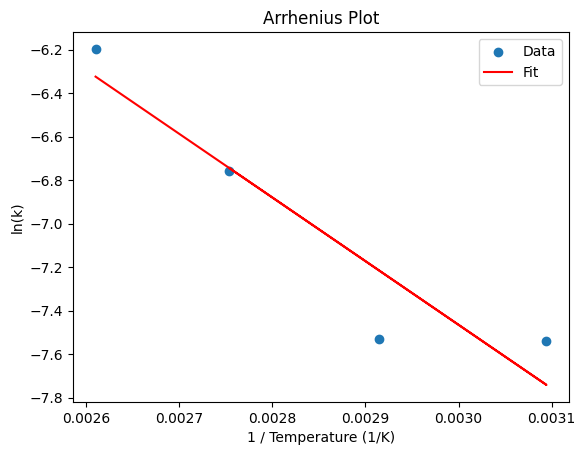

Equation: ln(k) = (-2924.645) * (1/T) + (1.310)
R-squared: 0.877
RSM: 0.198
E_a:  24315.50
A:  3.70


In [42]:
# Calculate average k for each temperature
avg_k_values = df_all_temps.groupby('temperature')['k (s^-1)'].mean()

# Map temperature strings to numeric values in Celsius
temperature_map = {
    'T = 50 C': 50,
    'T = 70 C': 70,
    'T = 90 C': 90,
    'T = 110 C': 110
}

# Extract temperatures in Kelvin
temperatures_C = np.array([temperature_map[temp] for temp in avg_k_values.index])
temperatures_K = temperatures_C + 273.15

# Prepare data for linear regression
x = 1 / temperatures_K
y = np.log(avg_k_values.values)

# Perform linear regression
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

# Get the slope (m) and intercept (b)
m = model.coef_[0]
b = model.intercept_

# Calculate activation energy (E_a) and pre-exponential factor (A)
E_a = -m * R
A = np.exp(b)

# Plot the data and the linear fit
plt.scatter(x, y, label='Data')
plt.plot(x, model.predict(x.reshape(-1, 1)), color='red', label='Fit')
plt.xlabel('1 / Temperature (1/K)')
plt.ylabel('ln(k)')
plt.title('Arrhenius Plot')
plt.legend()
plt.show()

E_a, A

# Calculate R-squared
y_pred = model.predict(x.reshape(-1, 1))
u = ((y - y.mean())**2).sum()
v = ((y - y_pred)**2).sum()
r_squared = 1 - v / u

# Calculate root mean squared error (RSM)
rse = np.sqrt(np.mean((y - y_pred)**2))

# Print results
print("Equation: ln(k) = ({:.3f}) * (1/T) + ({:.3f})".format(m, b))
print("R-squared:","{:.3f}".format(r_squared))
print("RSM:", "{:.3f}".format(rse))
print("E_a: ","{:.2f}".format(E_a))
print("A: ","{:.2f}".format(A))

In [44]:
temperatures_K

array([383.15, 323.15, 343.15, 363.15])

For a first-order reaction, the rate constant (\( k \)) represents the reaction rate constant.

In a first-order reaction, the rate of the reaction is directly proportional to the concentration of the reactant. The rate law for a first-order reaction is typically expressed as:

 $\text{Rate} = k \cdot [A]$

Where:
- \( k \) is the rate constant.
- \([A]\) is the concentration of the reactant.

So, in a first-order reaction, the rate constant \( k \) essentially represents the speed at which the reaction proceeds. It governs how quickly the reactant concentration decreases over time.

Black Box Model to Calculate Reaction Rate

  1. Data Collection: gather time versus conversion data for various temperatures
  2. Data preprocessing: clean and prepare data
  3. Feature selection / engineering
  - select features used to predict the reaction
  - Here we use time, conversion, temperature (X$_1$, X$_2$, X$_3$) as features.  Y$_1$ is reaction rate
  4. Model selection: use appropriate machine learning model
  - linear
  - polynomial
  - neural network
  - random forest
  - support vector machine CVM

  5. Model validation: split data into training / validation
  - validate model performance with mean, squared error, r$^2$

  6. Optimize: Tune hyperparameters to improve performance

  7. Prediction: model to predict reaction rate
  - python skit-learn libraries

In [49]:
# Define the mapping between temperature strings and Kelvin values
temperature_map = {
    'T = 50 C': 323.15,
    'T = 70 C': 343.15,
    'T = 90 C': 363.15,
    'T = 110 C': 383.15
}

# Add a new column called 'temperature, K' to df_all_temps
df_all_temps['temperature, K'] = df_all_temps['temperature'].map(temperature_map)

# Display the updated DataFrame
df_all_temps.head()


,time (s),conversion X,k (s^-1),temperature,"temperature, K"
0,0.0,0.00,NaN,T = 50 C,323.15
1,155.0,0.21,0.001715,T = 50 C,323.15
2,303.0,0.28,0.001283,T = 50 C,323.15
3,622.0,0.29,0.000657,T = 50 C,323.15
4,1212.0,0.30,0.000354,T = 50 C,323.15


## Black Box Model Approach to Calculate Reaction Rate

  1. Data Collection: gather time versus conversion data for various temperatures. This is given in the excel file.
  2. Data preprocessing: clean and prepare data
  3. Feature selection / engineering
  > select features used to predict the reaction
  > Here we use time, conversion, temperature (X$_1$, X$_12$, X$_3$) as features.  Y$_1$ is reaction rate
  4. Model selection: use appropriate machine learning model
  > linear
  > polynomial
  > neural network
  > random forest
  > support vector machine SVM

  5. Model validation: split data into training / validation
  > doing 80/20 split for training vs validation
  > validate model performance with mean squared error, r$^2$
  > Plotting actual vs predicted for additional visual inspection

  6. Optimize: Tune hyperparameters to improve performance
  > To hyperparameter tune and optimize parameters for the best model, you can use techniques like Grid Search or Random Search. I will be using Grid Search alogirth on the best perfoming model based on the lowest MSE or highest R-squared score from previous step (spoiler: it's random forest!).
  > After i find optimized paramaters, i will recreate the model with this!!

  7. Prediction: model to predict reaction rate
  
  Using python skit-learn machine learning libraries

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Define the data
data = df_all_temps

# Create a DataFrame
df2 = pd.DataFrame(data)

# Drop rows with missing values
df2.dropna(inplace=True)

# Split data into features (X) and target variable (y)
X = df2[['time (s)', 'conversion X', 'temperature, K']]
y = df2['k (s^-1)']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
print("Linear Regression:")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error (Linear Regression):", mse_lr)

# Polynomial Regression
print("\nPolynomial Regression:")
poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)

# Random Forest Regression
print("\nRandom Forest Regression:")
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest Regression):", mse_rf)

# Support Vector Regression (SVM)
print("\nSupport Vector Regression (SVM):")
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error (Support Vector Regression):", mse_svr)

# Neural Network (Multi-layer Perceptron)
print("\nNeural Network (Multi-layer Perceptron):")
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print("Mean Squared Error (Neural Network):", mse_mlp)



Linear Regression:
Mean Squared Error (Linear Regression): 4.5516758547385346e-07

Polynomial Regression:
Mean Squared Error (Polynomial Regression): 2.218988375256822e-07

Random Forest Regression:
Mean Squared Error (Random Forest Regression): 1.3576773915961103e-07

Support Vector Regression (SVM):
Mean Squared Error (Support Vector Regression): 3.7318773608763634e-06

Neural Network (Multi-layer Perceptron):
Mean Squared Error (Neural Network): 3196.932885354673


Linear Regression:
Mean Squared Error (Linear Regression): 4.5516758547385346e-07
R-squared (Linear Regression): 0.45123294388923374
Linear Regression Equation: y = -0.012644432748145227 + -1.8155178962632073e-08 * time + -0.0033089798275234223 * conversion_X + 4.5534515849713925e-05 * temperature_K


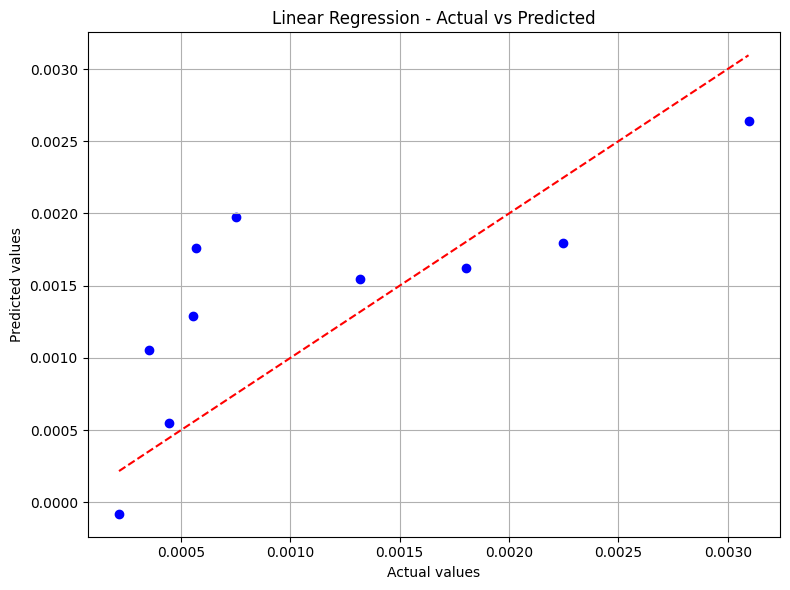


Polynomial Regression:
Mean Squared Error (Polynomial Regression): 2.218988375256822e-07
R-squared (Polynomial Regression): 0.7324704664621492
Polynomial Regression Equation: Not available


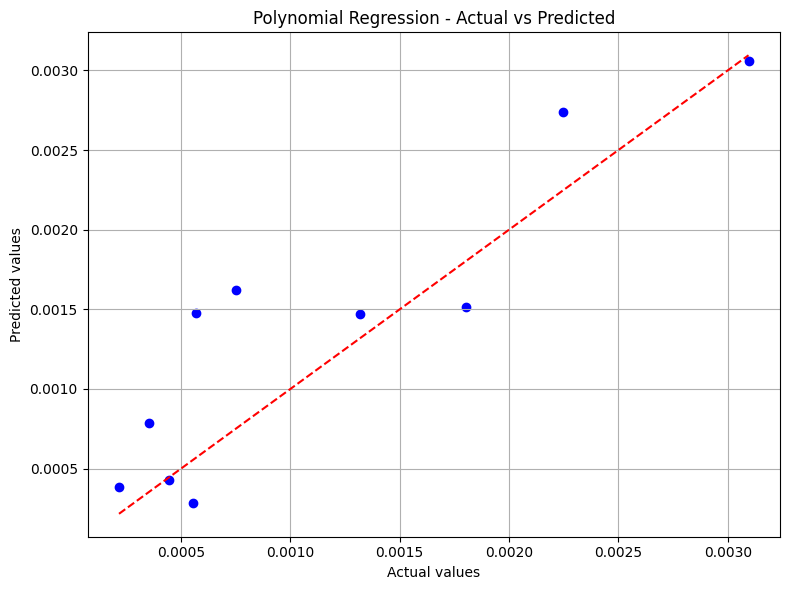


Random Forest Regression:
Mean Squared Error (Random Forest Regression): 1.3576773915961103e-07
R-squared (Random Forest Regression): 0.8363133384028859
Random Forest Regression Equation: Not available


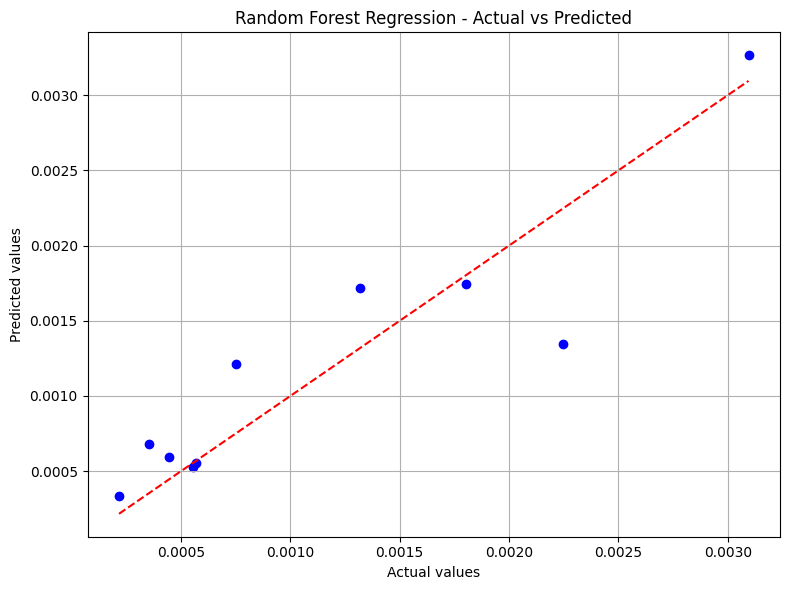


Support Vector Regression (SVM):
Mean Squared Error (Support Vector Regression): 3.7318773608763634e-06
R-squared (Support Vector Regression): -3.499290851220289
Support Vector Regression Equation: Not available


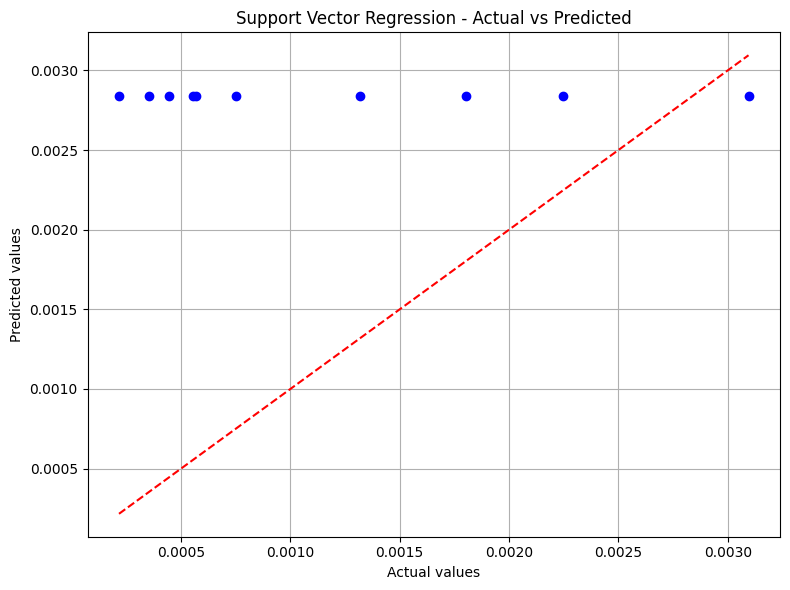


Neural Network (Multi-layer Perceptron):
Mean Squared Error (Neural Network): 3196.932885354673
R-squared (Neural Network): -3854341793.2501082
Neural Network Equation: Not available


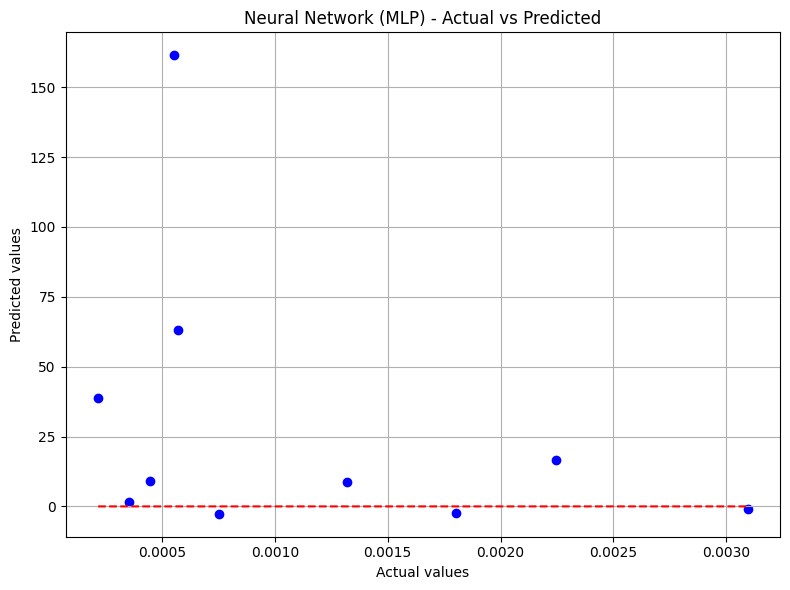

In [55]:
import numpy as np
from sklearn.metrics import r2_score

# Function to calculate R-squared (R2) score
def calculate_r2(y_test, y_pred):
    return r2_score(y_test, y_pred)

# Function to print model equation
def print_model_equation(model, model_name):
    if model_name == "Linear Regression":
        print(f"{model_name} Equation: y = {model.intercept_} + {model.coef_[0]} * time + {model.coef_[1]} * conversion_X + {model.coef_[2]} * temperature_K")
    elif model_name == "Polynomial Regression":
        print("Polynomial Regression Equation: Not available")

# Plotting the results
def plot_results(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Linear Regression
print("Linear Regression:")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = calculate_r2(y_test, y_pred_lr)
print("Mean Squared Error (Linear Regression):", mse_lr)
print("R-squared (Linear Regression):", r2_lr)
print_model_equation(lr_model, "Linear Regression")
plot_results(y_test, y_pred_lr, "Linear Regression")

# Polynomial Regression
print("\nPolynomial Regression:")
poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = calculate_r2(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)
print("R-squared (Polynomial Regression):", r2_poly)
print_model_equation(None, "Polynomial Regression")
plot_results(y_test, y_pred_poly, "Polynomial Regression")

# Random Forest Regression
print("\nRandom Forest Regression:")
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = calculate_r2(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest Regression):", mse_rf)
print("R-squared (Random Forest Regression):", r2_rf)
print("Random Forest Regression Equation: Not available")
plot_results(y_test, y_pred_rf, "Random Forest Regression")

# Support Vector Regression (SVM)
print("\nSupport Vector Regression (SVM):")
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = calculate_r2(y_test, y_pred_svr)
print("Mean Squared Error (Support Vector Regression):", mse_svr)
print("R-squared (Support Vector Regression):", r2_svr)
print("Support Vector Regression Equation: Not available")
plot_results(y_test, y_pred_svr, "Support Vector Regression")

# Neural Network (Multi-layer Perceptron)
print("\nNeural Network (Multi-layer Perceptron):")
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = calculate_r2(y_test, y_pred_mlp)
print("Mean Squared Error (Neural Network):", mse_mlp)
print("R-squared (Neural Network):", r2_mlp)
print("Neural Network Equation: Not available")
plot_results(y_test, y_pred_mlp, "Neural Network (MLP)")

In [58]:
import pandas as pd

# Create a list to store model results
results_list = []

# Add results for Linear Regression
results_list.append({'Model': 'Linear Regression', 'Mean Squared Error': mse_lr, 'R-squared': r2_lr})

# Add results for Polynomial Regression
results_list.append({'Model': 'Polynomial Regression', 'Mean Squared Error': mse_poly, 'R-squared': r2_poly})

# Add results for Random Forest Regression
results_list.append({'Model': 'Random Forest Regression', 'Mean Squared Error': mse_rf, 'R-squared': r2_rf})

# Add results for Support Vector Regression (SVM)
results_list.append({'Model': 'Support Vector Regression (SVM)', 'Mean Squared Error': mse_svr, 'R-squared': r2_svr})

# Add results for Neural Network (Multi-layer Perceptron)
results_list.append({'Model': 'Neural Network (MLP)', 'Mean Squared Error': mse_mlp, 'R-squared': r2_mlp})

# Convert the list of dictionaries to a DataFrame
model_results = pd.DataFrame(results_list)

# Display the model results
print(model_results)

# Recommend the best model based on the lowest MSE and highest R2 score
best_model_mse = model_results[model_results['Mean Squared Error'] == model_results['Mean Squared Error'].min()]
best_model_r2 = model_results[model_results['R-squared'] == model_results['R-squared'].max()]

print("\nBest Model based on Mean Squared Error:")
print(best_model_mse)

print("\nBest Model based on R-squared:")
print(best_model_r2)


                             Model  Mean Squared Error     R-squared
0                Linear Regression        4.551676e-07  4.512329e-01
1            Polynomial Regression        2.218988e-07  7.324705e-01
2         Random Forest Regression        1.357677e-07  8.363133e-01
3  Support Vector Regression (SVM)        3.731877e-06 -3.499291e+00
4             Neural Network (MLP)        3.196933e+03 -3.854342e+09

Best Model based on Mean Squared Error:
                      Model  Mean Squared Error  R-squared
2  Random Forest Regression        1.357677e-07   0.836313

Best Model based on R-squared:
                      Model  Mean Squared Error  R-squared
2  Random Forest Regression        1.357677e-07   0.836313


In [59]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", -best_score)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Mean Squared Error: 5.410523707455071e-07



Random Forest Regression Optimized with hypertuning paramaters:
Mean Squared Error (Random Forest Regression Optimized): 1.3576773915961103e-07
R-squared (Random Forest Regression Optimized): 0.8363133384028859
Random Forest Regression Equation: Not available


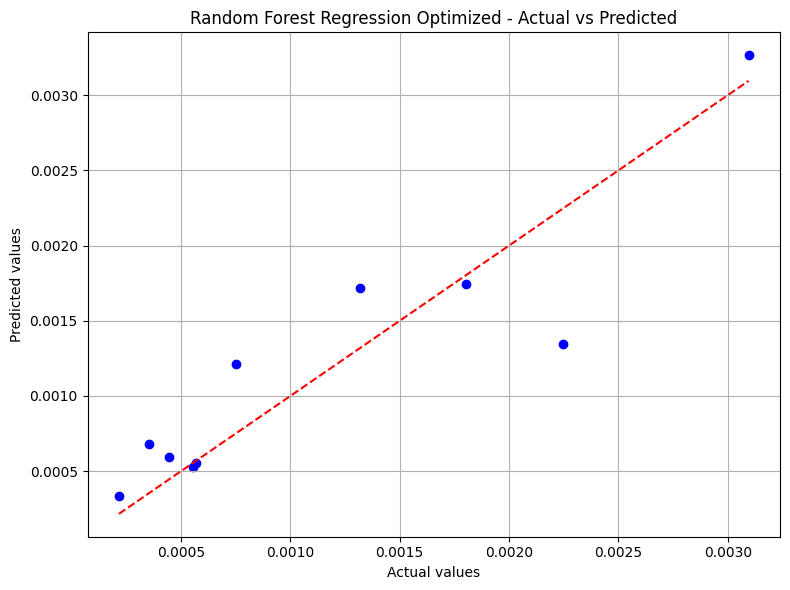

In [60]:
# Create a new Random Forest model with the optimized parameters
optimized_rf_model = RandomForestRegressor(**best_params, random_state=42)

# Fit the model to the entire training dataset
optimized_rf_model.fit(X_train, y_train)

# Now you can use this optimized_rf_model for prediction
# Random Forest Regression Optimized
print("\nRandom Forest Regression Optimized with hypertuning paramaters:")
y_pred_rf_optimized = optimized_rf_model.predict(X_test)
mse_rf_optimized = mean_squared_error(y_test, y_pred_rf_optimized)
r2_rf_optimized = calculate_r2(y_test, y_pred_rf_optimized)
print("Mean Squared Error (Random Forest Regression Optimized):", mse_rf_optimized)
print("R-squared (Random Forest Regression Optimized):", r2_rf_optimized)
print("Random Forest Regression Equation: Not available")
plot_results(y_test, y_pred_rf_optimized, "Random Forest Regression Optimized")

## COMPARISON AND DISCUSSION OF FLAWS
> use statistical methods

### Model Flaws w/ analytical approach
- Assuming first-order reaction kinetics
- Ignoring side reaction
- Assuming constant temperature

Here’s a breakdown of the advantages of using the black box method over the Arrhenius equation:

### Advantages of the Black Box Method

1. Empirical flexibility
> Don't need reaction pathway knowledge

2. Data driven
> Uses actual data directly to predict rate constant
> More accurate and high quality data

3. Non-linear relationship
> Black box method can capture this versus Arrhenius, which is linear in logarithmic function

4. Adaptability
> with new adapted and recalibrated data can get continuous improvement of model

5. Complexity dependencies
> analytical model doesn't account for external field, pressure

### Limitations of the Arrhenius Equation

1. **Assumption of Exponential Temperature Dependence**:
   - The Arrhenius equation assumes that the rate constant depends exponentially on temperature, which may not hold true for all reactions, especially those involving complex mechanisms.

2. **Need for Activation Energy**:
   - Accurate use of the Arrhenius equation requires knowledge of the activation energy and pre-exponential factor, which might not be easily obtainable for all reactions.

3. **Linearity in Logarithmic Form**:
   - The Arrhenius equation’s linear relationship in a plot of \(\ln(k)\) versus \(1/T\) can be limiting for reactions that do not exhibit such straightforward behavior.

### Summary

While the Arrhenius equation is a powerful and widely used tool in chemical kinetics, providing a straightforward method to relate rate constants to temperature, the black box method offers greater flexibility and adaptability. The black box approach is particularly advantageous when dealing with complex systems where the exact reaction mechanisms are unknown or when multiple factors influence the reaction rate. It leverages empirical data to model the system more accurately, accommodating non-linear relationships and complex dependencies that the Arrhenius equation may not capture.

# SCALE UP to CSTR

To find the optimal size (volume) of CSTR in series at given rate constant use systematic approach with goal of minimizing total volume of reactor while achieving desired conversion
> total CSTRs options from: 2-10

Overall steps/approach


### Steps


 1. Define reaction kinetics
 > A → B
 > K, rate constant at Temp 72.5C using analytical method
 > initial concentration [A]
 > x: desired conversion

 2. Total conversion across multiple CSTrs

 > x = 1 - $\prod_{i=1}^{N} (1 - X_i)$
 >where, N is the total number of CSTRs

 3. Volume calculation for each CSTR
 > design equation

 > $ V_i = \frac{F_{AO}(X_i - X_{i-1})}{-r_A}$

 where:

 > $ F_{AO}$ = molar flow rate of A

 > $ X_{i-1}$ = conversion at exit of previous reactor

 > $-r_A$ = reaction rate

 > first order $-r_A$ = $C_A$

 >$C_A$ = $C_{AO}$(1-X)

 >$V_i = \frac{F_{AO}(X_i - X_{i-1})}{KC_{AO}(1 - X_i)}$

 4. Total volume minimization

 > $V_{total} =  \prod_{i=1}^{N}V_i$

 5. Iterative calculation for total number of CSTR (2 to 10)
 > distribute total conversion X across N reactor in various ways
 > calculate volume for each configuration
 > identify configuration that results in minimum total volume

 OPTION 2 --> Graphical way- Levenspiel Plot
 > visualize relationship between reactor volume and conversion
 > plot Levenspel curve: $\frac{-1}{r_A}$ against X (from X = 0 to X = X).
 > area under the curve is equal to the volume of CSTR

 first order:  $-r_A = KC_A = KC_{AO}(1-X)$

 > divide total area under the curve from X = 0 to X = X into N segemnt
 > N = 2, N = 3,...N = 10

  6. Compare total volume
  > calculate total volume for each configuration by summing individual segments
  > smallest total volume: optimal one



In [70]:
import numpy as np

# Given equation: ln(k) = (-2924.645) * (1/T) + (1.310)
T_Celsius = 72.5  # Temperature in Celsius
T_Kelvin = T_Celsius + 273.15  # Convert Celsius to Kelvin

# Calculate ln(K)
ln_K = (-2924.645) * (1 / T_Kelvin) + 1.310

# Calculate K by exponentiating ln(K)
K = math.exp(ln_K)

print("K when temperature is {}°C: {:.6f}".format(T_Celsius, K))

# Constants
k = K # Rate constant based on Arrehenius equation
C_A0 = 1.0 # Initial concentration (assumed)
F_A0 = 1.0 # Molar flow rate (assumed)
X = 0.99 # Desired conversion

def reactor_volume(Xi, Xim1, k, C_A0, F_A0):
    return F_A0 * (Xi - Xim1) / (k * C_A0 * (1 - Xi))

def total_volume(N, X, k, C_A0, F_A0):
    conversions = np.linspace(0, X, N+1)
    volumes = [reactor_volume(conversions[i], conversions[i-1], k, C_A0, F_A0) for i in range(1, N+1)]
    return sum(volumes)

# Calculate and print optimal volumes for each number of reactors
for N in range(2, 11):
    V_total = total_volume(N, X, k, C_A0, F_A0)
    print(f"Total number of CSTRs: {N}, Total Volume: {V_total:.4f}")





K when temperature is 72.5°C: 0.000784
Total number of CSTRs: 2, Total Volume: 64400.1643
Total number of CSTRs: 3, Total Volume: 43966.3677
Total number of CSTRs: 4, Total Volume: 33845.8886
Total number of CSTRs: 5, Total Volume: 27829.6222
Total number of CSTRs: 6, Total Volume: 23854.9589
Total number of CSTRs: 7, Total Volume: 21040.9595
Total number of CSTRs: 8, Total Volume: 18948.6707
Total number of CSTRs: 9, Total Volume: 17335.0710
Total number of CSTRs: 10, Total Volume: 16054.8515


Total number of CSTRs: 2, Total Volume: 33141.0748
Total number of CSTRs: 3, Total Volume: 23126.9747
Total number of CSTRs: 4, Total Volume: 18216.3439
Total number of CSTRs: 5, Total Volume: 15325.9864
Total number of CSTRs: 6, Total Volume: 13435.2624
Total number of CSTRs: 7, Total Volume: 12109.7911
Total number of CSTRs: 8, Total Volume: 11133.8984
Total number of CSTRs: 9, Total Volume: 10388.6067
Total number of CSTRs: 10, Total Volume: 9803.0336


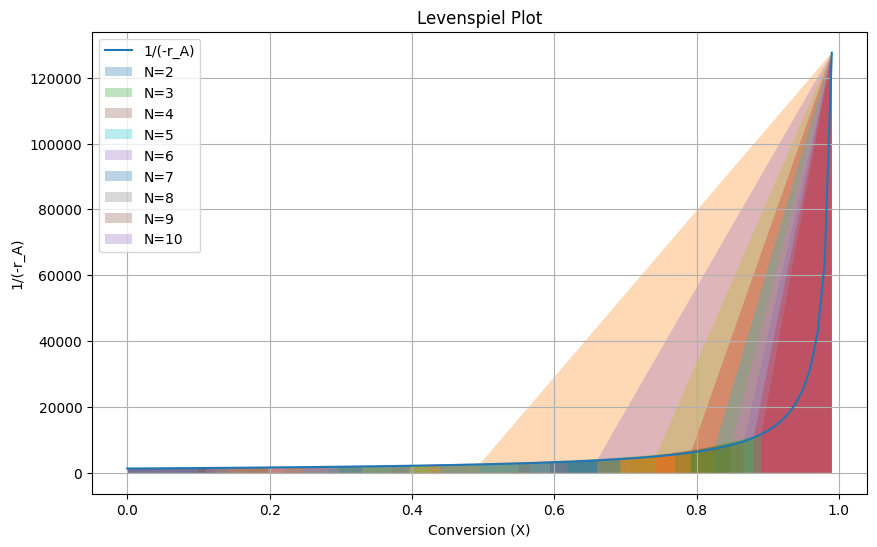

In [72]:
# GRAPHICAL METHOD

import numpy as np
import matplotlib.pyplot as plt

# Constants
k = K  # Rate constant (assumed)
C_A0 = 1.0  # Initial concentration (assumed)
X_desired = 0.99  # Desired conversion

# Define the reaction rate and its inverse
def reaction_rate(X, k, C_A0):
    return k * C_A0 * (1 - X)

def inverse_reaction_rate(X, k, C_A0):
    return 1 / (k * C_A0 * (1 - X))

# Generate data for the Levenspiel plot
X_values = np.linspace(0, X_desired, 100)
inverse_r_values = inverse_reaction_rate(X_values, k, C_A0)

# Plot the Levenspiel plot
plt.figure(figsize=(10, 6))
plt.plot(X_values, inverse_r_values, label='1/(-r_A)')
plt.xlabel('Conversion (X)')
plt.ylabel('1/(-r_A)')
plt.title('Levenspiel Plot')
plt.grid(True)

# Calculate and plot the areas for different numbers of CSTRs
for N in range(2, 11):
    X_steps = np.linspace(0, X_desired, N+1)
    areas = []
    for i in range(N):
        X1, X2 = X_steps[i], X_steps[i+1]
        area = (inverse_reaction_rate(X1, k, C_A0) + inverse_reaction_rate(X2, k, C_A0)) * (X2 - X1) / 2
        areas.append(area)
        plt.fill_between([X1, X2], [inverse_reaction_rate(X1, k, C_A0), inverse_reaction_rate(X2, k, C_A0)], alpha=0.3, label=f'N={N}' if i == 0 else "")

    total_volume = sum(areas)
    print(f"Total number of CSTRs: {N}, Total Volume: {total_volume:.4f}")

plt.legend()
plt.show()


In [71]:
# Constants
k = K  # Rate constant
C_A0 = 1.0  # Initial concentration (assumed)
X_desired = 0.99  # Desired conversion

# Function to calculate reactor volume
def reactor_volume(Xi, Xim1, k, C_A0, F_A0):
    return F_A0 * (Xi - Xim1) / (k * C_A0 * (1 - Xi))

# Function to calculate total volume
def total_volume(N, X, k, C_A0, F_A0):
    conversions = np.linspace(0, X, N+1)
    volumes = [reactor_volume(conversions[i], conversions[i-1], k, C_A0, F_A0) for i in range(1, N+1)]
    return sum(volumes)

# Find configuration with lowest total volume
lowest_volume = float('inf')
optimal_configuration = None

for N in range(2, 11):
    V_total = total_volume(N, X_desired, k, C_A0, F_A0)
    if V_total < lowest_volume:
        lowest_volume = V_total
        optimal_configuration = N

print(f"Optimal configuration: {optimal_configuration} CSTRs, Total Volume: {lowest_volume:.4f}")


Optimal configuration: 10 CSTRs, Total Volume: 16054.8515



To model the conversion across 4 CSTRs in series with different temperatures and residence times, we can use the following steps:

Calculate the rate constant (k) for each temperature.
Use arrhenius equation expression calculated earlier to find the rate constant at a given temperature

Calculate the concentration of reactant 𝐴 exiting each reactor based on the residence time and the reaction kinetics.

Calculate the conversion in each reactor based on the concentration of reactant A entering and exiting the reactor.

Plot the conversion profile across the 4 CSTRs.

In [78]:
# Constants
R = 8.314  # Universal gas constant, J/(mol*K)
C_A0 = 1.0  # Initial concentration, mol/L
X_desired = 0.99  # Desired conversion

# Temperatures and residence times for each CSTR
conditions = [[89, 18], [84, 23], [81, 25], [77, 25], [76, 27]]

# Function to calculate rate constant at a given temperature
def rate_constant(T):
    return np.exp((-2924.645 / T) + 1.310)

# Function to simulate conversion across CSTRs
def simulate_conversion(N, conditions):
    X = np.zeros(N+1)
    X[0] = 0  # Initial conversion

    for i in range(N):
        T, tau = conditions[i]
        k = rate_constant(T + 273.15)  # Convert temperature to Kelvin
        X[i+1] = 1 - np.exp(-k * tau) * (1 - X[i])

    return X

# Simulate conversion across 4 CSTRs
N = 4  # Number of CSTRs
conversion = simulate_conversion(N, conditions)

# Print conversion for each reactor
for i in range(N+1):
    print(f"Conversion in reactor {i+1}: {conversion[i]:.4f}")


Conversion in reactor 1: 0.0000
Conversion in reactor 2: 0.0205
Conversion in reactor 3: 0.0434
Conversion in reactor 4: 0.0661
Conversion in reactor 5: 0.0863


In [2]:

!jupyter nbconvert --to html Data Science Example.ipynb


[NbConvertApp] WARNING | pattern 'Data' matched no files
[NbConvertApp] WARNING | pattern 'Science' matched no files
[NbConvertApp] WARNING | pattern 'Example.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    